In [224]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn.objects as so

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [46]:
df = pd.read_csv('../result/240226-192123.csv')
df2 = pd.read_csv('../result/240226-212406.csv')
df3 = pd.read_csv('../result/240226-234620.csv')

df['dataset'] = 'tfinance'
df2['dataset'] = 'amazon'
df3['dataset'] = 'yelp'

full_df = pd.concat([df, df2, df3])

In [49]:
full_df.query('eval_type == "round_0_nodes"').groupby(['dataset', 'model_name'])['auc'].mean().reset_index().pivot(index='model_name', columns=['dataset'], values='auc')

dataset,amazon,tfinance,yelp
model_name,,,
BWGNN,0.975580,0.908708,0.796565
GAT,0.748391,0.555694,0.726806
GCN,0.754637,0.854191,0.579750
GIN,0.903669,0.899534,0.719022
GraphSAGE,0.578989,0.561586,0.739021
XGB,0.983649,0.968641,0.958056


In [210]:
round_df = pd.read_csv('../result/240227-091623.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


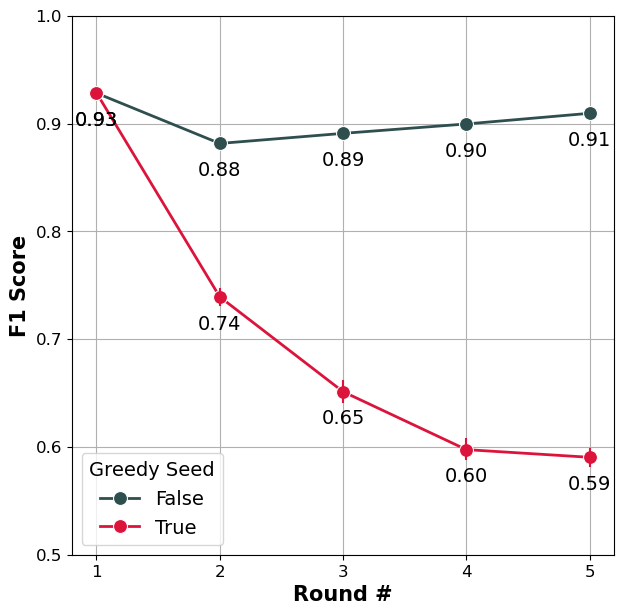

In [291]:
import matplotlib.pyplot as plt
from matplotlib import ticker

true_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == True & round_int < 6')[['round_int', 'f1']].values
false_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == False & round_int < 6')[['round_int', 'f1']].values

fig, ax = plt.subplots(figsize=(7, 7))
p1 = sb.lineplot(data=round_result_df.query('round_int < 6'), x='round_int', y='f1', hue='greedy_seed', palette=['darkslategray', 'crimson'], linewidth=2, err_style='bars', marker='o', markersize=10)
plt.legend()

for vals in [true_means, false_means]:
    for i in vals:
            ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

plt.legend(title='Greedy Seed', fontsize='14', title_fontsize='14')
plt.xlabel("Round #", fontsize=15, fontweight='bold')
plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
plt.xticks(np.arange(1, 6, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0.5, 1))


plt.grid()
plt.show()


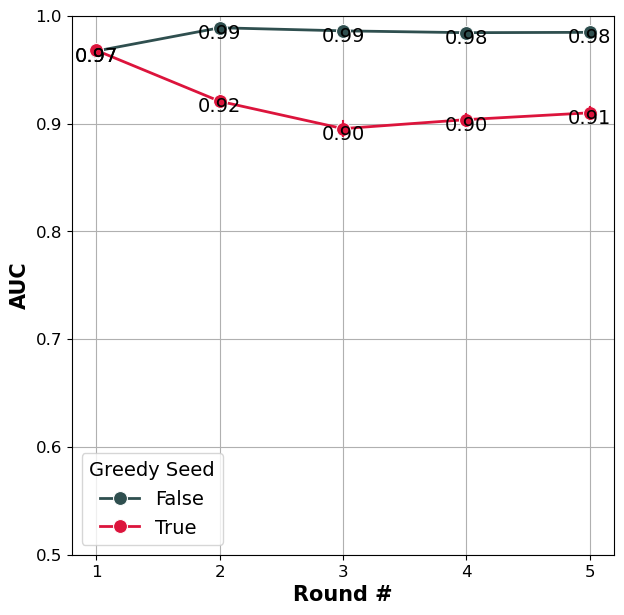

In [290]:
import matplotlib.pyplot as plt
from matplotlib import ticker

true_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == True & round_int < 6')[['round_int', 'auc']].values
false_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == False & round_int < 6')[['round_int', 'auc']].values

fig, ax = plt.subplots(figsize=(7, 7))
p1 = sb.lineplot(data=round_result_df.query('round_int < 6'), x='round_int', y='auc', hue='greedy_seed', palette=['darkslategray', 'crimson'], linewidth=2, err_style='bars', marker='o', markersize=10)

for vals in [true_means, false_means]:
    for i in vals:
            ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

plt.legend(title='Greedy Seed', fontsize='14', title_fontsize='14')
plt.xlabel("Round #", fontsize=15, fontweight='bold')
plt.ylabel("AUC", fontsize=15, fontweight='bold')
plt.xticks(np.arange(1, 6, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0.5, 1))


plt.grid()
plt.show()


In [335]:
round_df = pd.read_csv('../result/240227-102257.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]

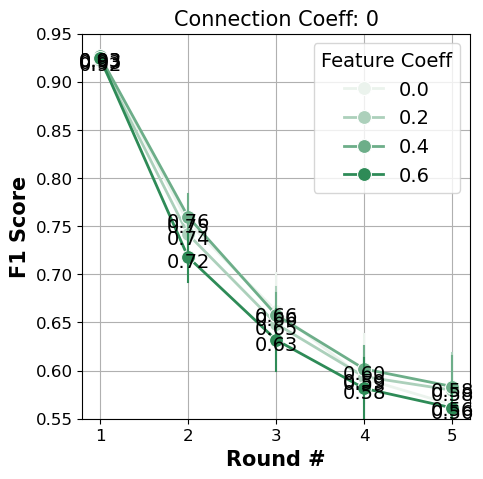

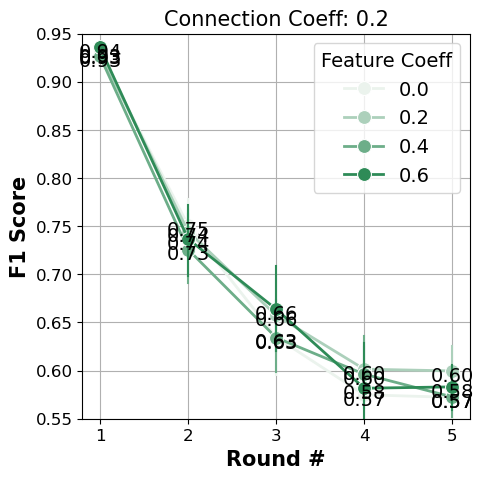

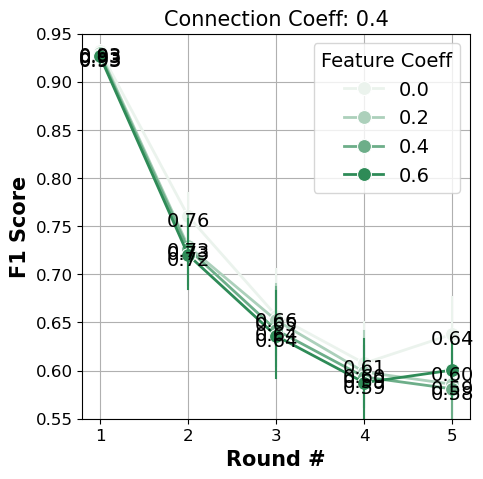

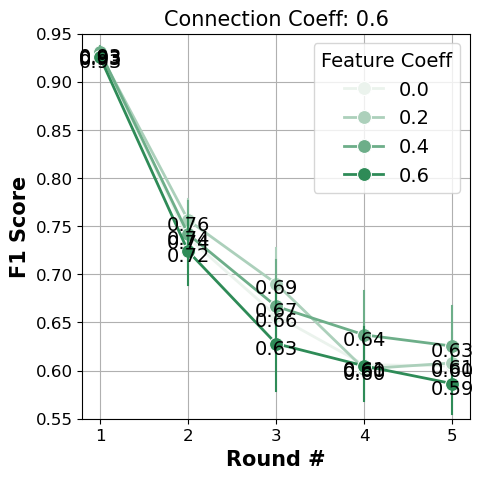

In [336]:
import matplotlib.pyplot as plt
from matplotlib import ticker

for ccoef in [0, 0.2, 0.4, 0.6]:
#for fcoef in [0, 1, 2, 3]:
    gseed = True
    res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    #res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    #plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    #plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

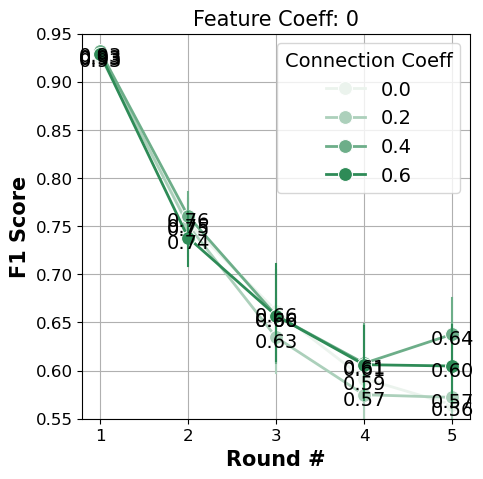

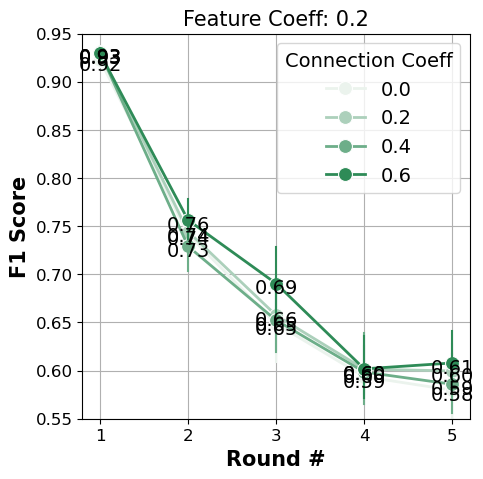

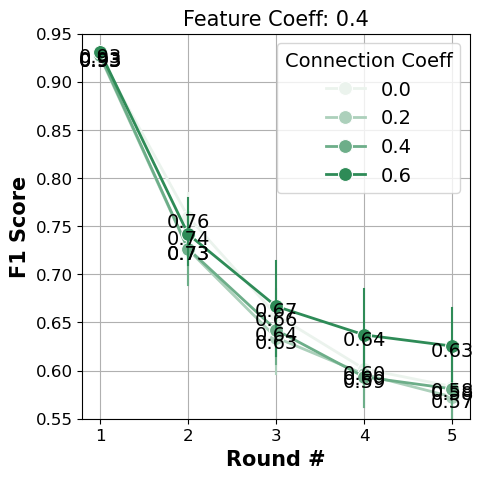

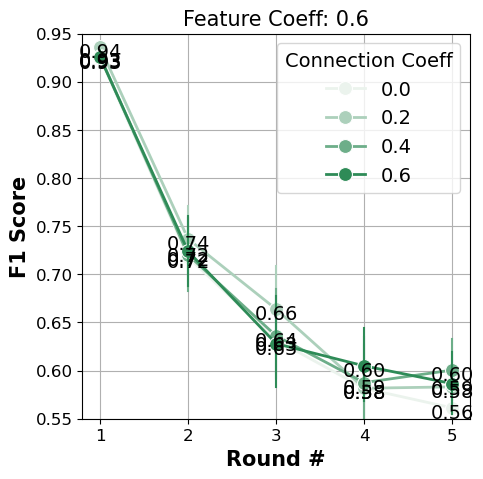

In [339]:
import matplotlib.pyplot as plt
from matplotlib import ticker

#for ccoef in [0, 0.2, 0.4, 0.6]:
for fcoef in [0, 0.2, 0.4, 0.6]:
    gseed = True
    #res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    #plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    #plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

In [332]:
round_df = pd.read_csv('../result/240227-143734.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]

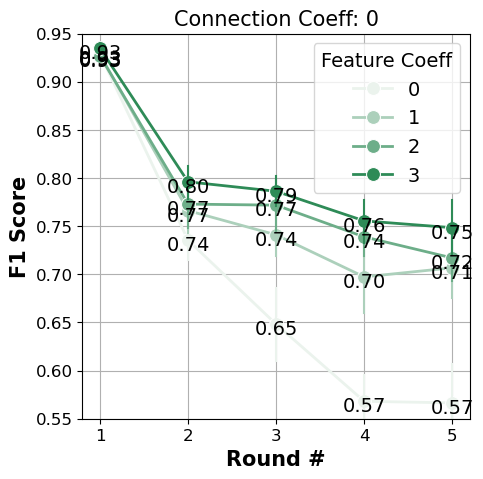

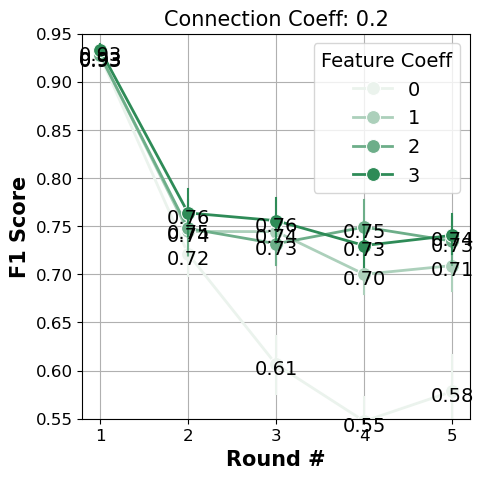

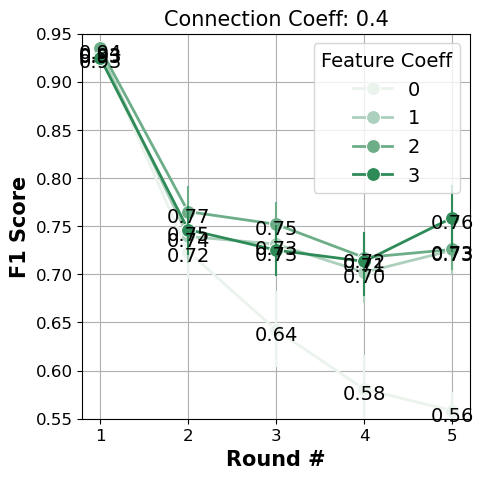

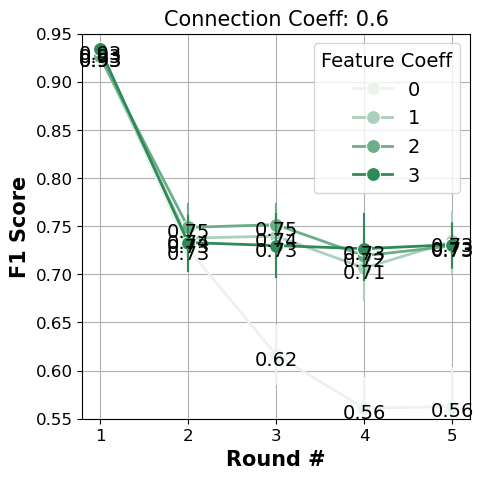

In [334]:
import matplotlib.pyplot as plt
from matplotlib import ticker

for ccoef in [0, 0.2, 0.4, 0.6]:
#for fcoef in [0, 1, 2, 3]:
    gseed = True
    res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    #res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    #plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    #plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

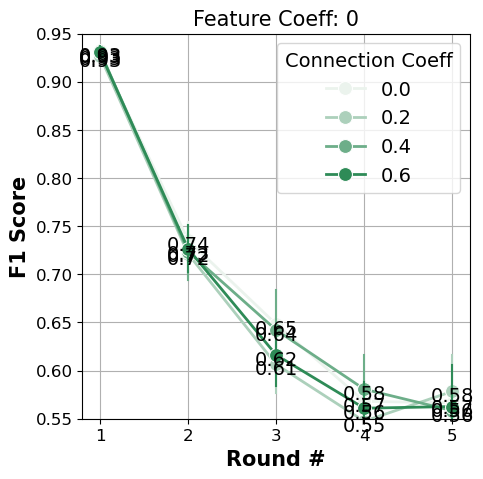

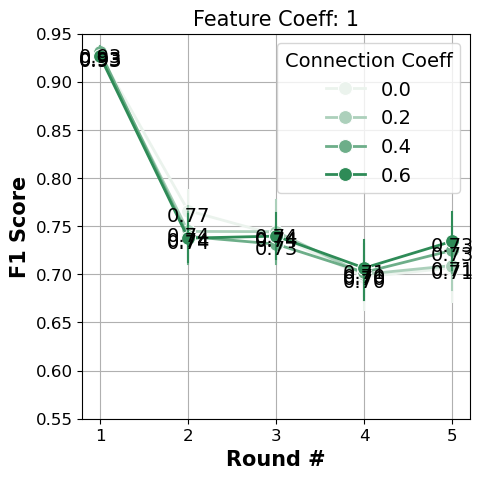

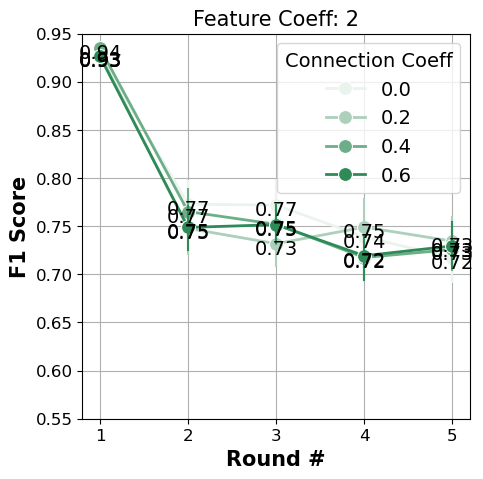

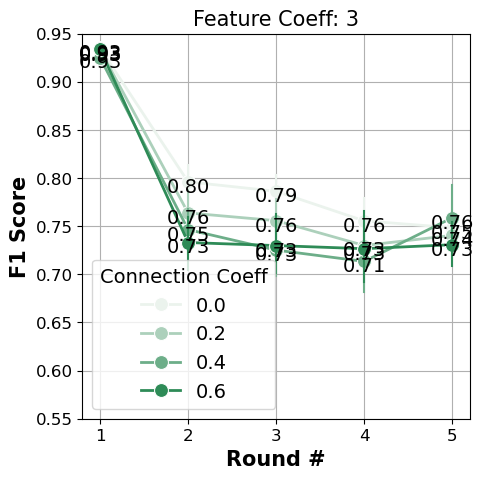

In [330]:
import matplotlib.pyplot as plt
from matplotlib import ticker

#for ccoef in [0, 0.2, 0.4, 0.6]:
for fcoef in [0, 1, 2, 3]:
    gseed = True
    #res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    #plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    #plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()